<a href="https://colab.research.google.com/github/Nickolay212/GA/blob/main/the_genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Pro1

Напишите кластеризацию данных с помощью генетических алгоритмов. Создайте 3 класса двумерных точек, выберите центры классов на достаточном расстоянии и сгенерируйте точки с разбросом так, чтобы классы не пересекались
Нужно расставить индексы точек, к какому классу относится какая точка, с помощью генетического алгоритма. В результате, каждый класс должен состоять из точек одного и того же индекса
Визуализируйте процесс обучение и итоговый результат


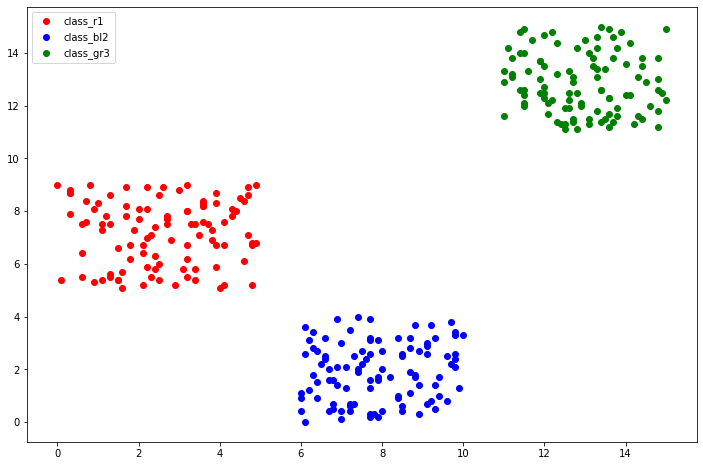


Количество точек: r-100 bl-100 gr-100


In [ ]:
n = 100

def set_class_point(num_x1, num_x2, num_y1, num_y2):
  x = [round(random.uniform(num_x1,num_x2),1) for i in range(100)]
  y = [round(random.uniform(num_y1,num_y2),1) for i in range(100)]
  return x, y

x_r, y_r = set_class_point(0,5,5,9)
x_bl, y_bl = set_class_point(6,10,0,4)
x_gr, y_gr = set_class_point(11,15,11,15)

fig = plt.figure(figsize=(12,8))
plt.scatter(x_r, y_r, c = 'red', label = 'class_r1')
plt.scatter(x_bl, y_bl, c = 'blue', label = 'class_bl2')
plt.scatter(x_gr, y_gr, c = 'green', label = 'class_gr3')
plt.legend()
plt.show()
print('')
print(f'Количество точек: r-{len(x_r)} bl-{len(x_bl)} gr-{len(x_gr)}')

In [ ]:
# Создаем индексы точек
id_points = {}
for i in range(300):
  if i < 100:
    id_points[i] = x_r[i], y_r[i]
  elif i <200 and i >99:
    id_points[i] = x_bl[i-100], y_bl[i-100]
  elif i >199:
    id_points[i] = x_gr[i-200], y_gr[i-200]  

# Ф-я создания объединения в классы
def getClass(x):
  class_r = {}
  class_bl = {}
  class_gr = {}
  for i,num in enumerate(x):
    if i < 100:
      class_r[num] = id_points[num]
    elif i <200 and i >99:
      class_bl[num] = id_points[num]
    elif i >199:
      class_gr[num] = id_points[num]
  return class_r, class_bl, class_gr

# Классы идеальные 
x = np.arange(300)
class_r_, class_bl_, class_gr_ = getClass(x)

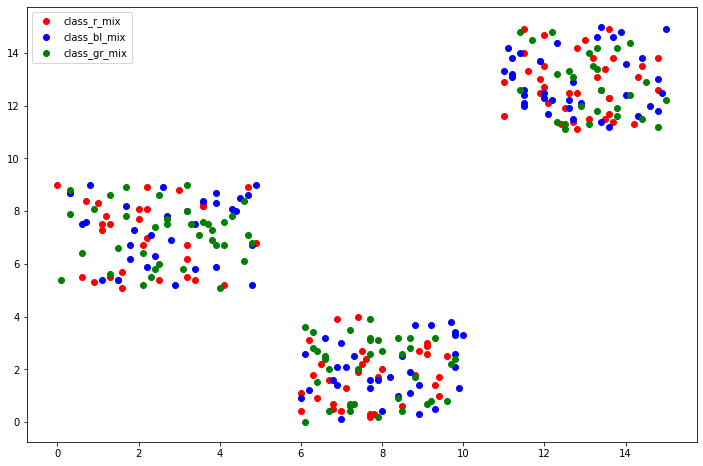

Количество точек: r-100 bl-100 gr-100


In [ ]:
# Перемешали индексы классов
x = np.arange(300)
np.random.shuffle(x)
class_r_mix, class_bl_mix, class_gr_mix = getClass(x)

fig = plt.figure(figsize=(12,8))
plt.scatter([val[0] for key, val in class_r_mix.items()], [val[1] for key, val in class_r_mix.items()], c = 'red', label = 'class_r_mix')
plt.scatter([val[0] for key, val in class_bl_mix.items()], [val[1] for key, val in class_bl_mix.items()], c = 'blue', label = 'class_bl_mix')
plt.scatter([val[0] for key, val in class_gr_mix.items()], [val[1] for key, val in class_gr_mix.items()], c = 'green', label = 'class_gr_mix')
plt.legend()
plt.show()

print(f'Количество точек: r-{len(class_r_mix)} bl-{len(class_bl_mix)} gr-{len(class_gr_mix)}')

In [ ]:
# Генетический алгоритм!!

def GetIndexPoints(class_r, class_bl, class_gr, popul, val, nsurv, reverse):
  newpopul = []
  newclass_r, newclass_bl, newclass_gr = [], [], []
  sval = sorted(val, reverse = reverse)
  for i in range(nsurv):
    index = val.index(sval[i])
    newpopul.append(popul[index])
    newclass_r.append(class_r[index])
    newclass_bl.append(class_bl[index])
    newclass_gr.append(class_gr[index])
  return newclass_r, newclass_bl, newclass_gr, sval, newpopul

# Ф-я нахождения рандомного из 20 лучших бота
def getParents(
    curr_popul,
    nsurv):   
  indexp1 = random.randint(0, nsurv - 1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1  
  botp1 = curr_popul[indexp1] # Получаем первого бота-родителя по indexp1    
  return botp1 # Возвращаем обоих полученных ботов

# Ф-я перестановки местами в боте индексов
def GetReplaceX(bot1, xx):
  bot1_ = bot1.copy()
  temp = xx.copy()
  for i in xx:
    l = len(temp)
    ll = temp.pop(random.randint(0,l-1))
    bot1_[i] = bot1[ll]
  return bot1_

# Текст заголовка по умолчанию
n = 100 # Общее число ботов
nsurv = 20 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv # Количество новых (столько новых ботов создается)
epochs = 2500 # количество эпох
mut = 0.4 # коэфициент мутаций

size = x.shape[0]
classes = ['class_r_mix', 'class_bl_mix', 'class_gr_mix']

# -------------------------------------Создадим выборку заполненную номерами классов -рандомно вместо индексов
rand_index2class = []
for j in range(n): # n ботов
  # 300 классов
  m1 = ['class_r_mix']*100
  m2 = ['class_bl_mix']*100
  m3 = ['class_gr_mix']*100
  m = m1+m2+m3
  random.shuffle(m)
  rand_index2class.append(m) # создаем 100 ботов по 300 рандомных точек

def mean(temp): # --------------------------------------------------- ф-я вычисления среднего
  return sum(temp)/len(temp)

for it in range(epochs): #----------------------------------по эпохам
  if it == 200:
    mut = 0.24
  if it == 500:
    mut = 0.15
  if it == 1500:
    mut = 0.02
  # ------------------------------------------------------------------ распределяем по группам классов, вписывая индексы
  val = [] # ошибка средних по классам
  class_r = []
  class_bl = []
  class_gr = []
  for jj, j in enumerate(rand_index2class):
    class_r.append([])
    class_bl.append([])
    class_gr.append([])
    for i, num in enumerate(j):
      if num == 'class_r_mix':
        class_r[jj].append(x[i])
      elif num == 'class_bl_mix':
        class_bl[jj].append(x[i])
      elif num == 'class_gr_mix':
        class_gr[jj].append(x[i])
    # print(len(class_r[jj]))
    # Разница средних по классам
    val_r = abs(mean(class_r[jj]) - 49.5)
    val_bl = abs(mean(class_bl[jj]) - 149.5)
    val_gr = abs(mean(class_gr[jj]) - 249.5)
    val.append(val_r+val_bl+val_gr)   # ---------------------------------------- Общая ошибка классов
  
  # --------------------------------------------------------------------20 лучших ботов
  newclass_r, newclass_bl, newclass_gr, sval, newpopul = GetIndexPoints(class_r, class_bl, class_gr, rand_index2class, val, nsurv, 0)
  print(f'Эпоха {it}, Общая ошибка {sval[0]}')

  # ------------------------------------------------------------------ Скрещиваю, мутирую
  for temp in range(nnew):
    bot1 = getParents(newpopul, nsurv) # minus bot2
    newbot = []
    xx = [] # ----Запоминаем каждое значение при не удовлетворению мутации
    for tt in range(300): # 300 точек
      if random.random() < mut:
        xx.append(tt)
      
      # newbot.append(GetReplaceX(bot1, xx))
    newpopul.append(GetReplaceX(bot1, xx))
  rand_index2class = newpopul

Эпоха 0, Общая ошибка 171.70000000000002
Эпоха 1, Общая ошибка 160.68
Эпоха 2, Общая ошибка 160.68
Эпоха 3, Общая ошибка 160.68
Эпоха 4, Общая ошибка 160.68
Эпоха 5, Общая ошибка 160.68
Эпоха 6, Общая ошибка 146.45999999999998
Эпоха 7, Общая ошибка 146.02
Эпоха 8, Общая ошибка 146.02
Эпоха 9, Общая ошибка 146.02
Эпоха 10, Общая ошибка 146.02
Эпоха 11, Общая ошибка 146.02
Эпоха 12, Общая ошибка 146.02
Эпоха 13, Общая ошибка 146.02
Эпоха 14, Общая ошибка 146.02
Эпоха 15, Общая ошибка 146.02
Эпоха 16, Общая ошибка 146.02
Эпоха 17, Общая ошибка 146.02
Эпоха 18, Общая ошибка 146.02
Эпоха 19, Общая ошибка 146.02
Эпоха 20, Общая ошибка 143.0
Эпоха 21, Общая ошибка 142.36
Эпоха 22, Общая ошибка 142.36
Эпоха 23, Общая ошибка 142.36
Эпоха 24, Общая ошибка 139.57999999999998
Эпоха 25, Общая ошибка 139.57999999999998
Эпоха 26, Общая ошибка 139.57999999999998
Эпоха 27, Общая ошибка 139.57999999999998
Эпоха 28, Общая ошибка 139.57999999999998
Эпоха 29, Общая ошибка 139.57999999999998
Эпоха 30, Общая

In [ ]:
print(newclass_r[0])
print(newclass_bl[0])
print(newclass_gr[0])
res_r, res_bl, res_gr = getClass(newclass_r[0]+newclass_bl[0]+newclass_gr[0])

[99, 5, 81, 0, 31, 44, 83, 105, 8, 54, 15, 75, 19, 56, 76, 71, 61, 32, 2, 85, 30, 40, 14, 97, 87, 59, 49, 51, 24, 67, 89, 109, 66, 77, 106, 18, 64, 41, 9, 60, 91, 11, 36, 65, 33, 21, 52, 80, 28, 46, 74, 25, 29, 96, 68, 62, 86, 53, 34, 92, 42, 27, 72, 1, 10, 84, 6, 17, 37, 57, 69, 47, 104, 45, 43, 3, 4, 12, 22, 79, 7, 73, 16, 88, 63, 35, 82, 55, 13, 48, 50, 39, 90, 38, 58, 23, 78, 70, 26, 20]
[150, 94, 119, 137, 151, 179, 211, 190, 114, 130, 194, 156, 202, 148, 149, 120, 128, 198, 101, 123, 116, 124, 134, 102, 126, 147, 122, 136, 193, 125, 145, 100, 139, 143, 175, 135, 166, 164, 103, 154, 195, 177, 127, 184, 98, 111, 174, 182, 168, 108, 178, 196, 200, 176, 155, 110, 133, 118, 107, 172, 208, 191, 169, 180, 146, 158, 113, 140, 183, 157, 121, 186, 187, 160, 132, 138, 115, 165, 181, 144, 152, 161, 162, 153, 117, 93, 159, 170, 163, 112, 131, 141, 95, 173, 167, 192, 185, 129, 142, 171]
[250, 228, 227, 239, 256, 237, 229, 201, 234, 216, 221, 279, 245, 226, 210, 188, 236, 258, 284, 203, 242, 23

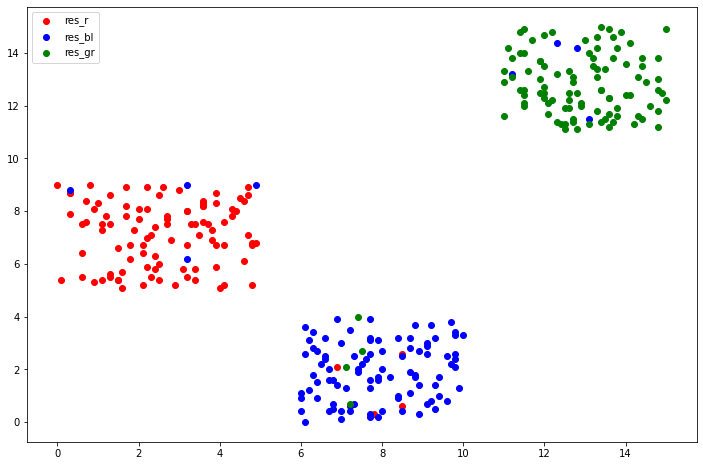

Количество точек: r-100 bl-100 gr-100


In [ ]:
fig = plt.figure(figsize=(12,8))
plt.scatter([val[0] for key, val in res_r.items()], [val[1] for key, val in res_r.items()], c = 'red', label = 'res_r')
plt.scatter([val[0] for key, val in res_bl.items()], [val[1] for key, val in res_bl.items()], c = 'blue', label = 'res_bl')
plt.scatter([val[0] for key, val in res_gr.items()], [val[1] for key, val in res_gr.items()], c = 'green', label = 'res_gr')
plt.legend()
plt.show()

print(f'Количество точек: r-{len(res_r)} bl-{len(res_bl)} gr-{len(res_gr)}')